# Import Libraries

In [19]:
import json
import requests
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
import numpy as np
from scipy import stats

import sys
sys.setrecursionlimit(10000)

# Data Collection and Cleaning

In [20]:
request_1 = requests.get("https://data.cityofchicago.org/resource/s6ha-ppgi.json")

request_1.status_code

200

In [21]:
with request_1 as f:
    raw_1 = f.json()

In [22]:
affordable_df = pd.DataFrame(raw_1)

In [23]:
affordable_df.head()

,community_area,community_area_number,property_type,property_name,address,zip_code,phone_number,management_company,units,x_coordinate,y_coordinate,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_43wa_7qmu,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i
0,Portage Park,15,ARO,4812-15 W. Montrose Apts.,4812-15 W. Montrose Ave.,60641,630-694-6968,@properties,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Englewood,67,Multifamily,New West Englewood Homes,2109 W. 63rd St.,60636,773-434-4929,Interfaith Housing Corp.,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Englewood,68,Multifamily,Antioch Homes II,301 W. Marquette Road,60621,773-994-4546,"Universal Management Service, Inc.",69,1175444.8128505,1860492.08380492,41.7725637689,-87.6324193182,"{'latitude': '41.7725637689', 'longitude': '-8...",31,32,66,21559,479
3,Washington Park,40,Senior HUD 202,St. Edmund's Corners,5556 S. Michigan Ave.,60637,773-667-7583,St. Edmund's Redevelopment Corp.,53,1178070.44297855,1867951.67674172,41.7929745219,-87.6225685185,"{'latitude': '41.7929745219', 'longitude': '-8...",53,4,7,22260,403
4,Humboldt Park,23,Multifamily,Nelson Mandela Apts.,526 N. Troy St.,60624,773-227-6332,Bickerdike Apts.,6,1155237.9587949,1903558.99055611,41.8911727354,-87.7053383382,"{'latitude': '41.8911727354', 'longitude': '-8...",41,46,24,21184,177


In [24]:
neighborhood_zip = pd.DataFrame(zip(affordable_df['community_area'], affordable_df['zip_code']))

In [25]:
neighborhood_zip.rename(columns={0:'neighborhood', 1:'zip'}, inplace=True)

In [26]:
neighborhood_zip

,neighborhood,zip
0,Portage Park,60641
1,West Englewood,60636
2,Englewood,60621
3,Washington Park,60637
4,Humboldt Park,60624
...,...,...
423,Near North Side,60622
424,Near South Side,60616
425,Washington Park,60637
426,Near West Side,60608


In [27]:
request_2 = requests.get('https://data.cityofchicago.org/resource/dw27-rash.json')

with request_2 as b:
    raw_2 = b.json()

progress_df = pd.DataFrame(raw_2)

In [28]:
hs_df = progress_df[progress_df['primary_category'] == 'HS']

In [29]:
hs_df['student_growth_rating'].value_counts()

AVERAGE              81
NO DATA AVAILABLE    36
BELOW AVERAGE        33
ABOVE AVERAGE        19
FAR ABOVE AVERAGE     3
Name: student_growth_rating, dtype: int64

In [30]:
hs_df2 = pd.DataFrame(zip(hs_df['school_id'],hs_df['zip'],hs_df['student_growth_rating'],hs_df['school_type']))

In [31]:
hs_df2

,0,1,2,3
0,400056,60651,ABOVE AVERAGE,Charter
1,400157,60617,ABOVE AVERAGE,Charter
2,400113,60610,AVERAGE,Charter
3,400179,60632,ABOVE AVERAGE,Charter
4,400077,60637,AVERAGE,Charter
...,...,...,...,...
171,609713,60637,BELOW AVERAGE,Neighborhood
172,609691,60639,AVERAGE,Neighborhood
173,609746,60615,AVERAGE,Neighborhood
174,609704,60623,AVERAGE,Neighborhood


In [32]:
hs_df2.rename(columns={0:'school_id',1:'zip',2:'student_growth',3:'school_type'}, inplace=True)

In [33]:
hs_df2.dropna(inplace=True)

In [34]:
hs_df2.shape

(172, 4)

In [35]:
first_merge = hs_df2.merge(neighborhood_zip,how='inner',on='zip')

In [36]:
first_merge

,school_id,zip,student_growth,school_type,neighborhood
0,400056,60651,ABOVE AVERAGE,Charter,Austin
1,400056,60651,ABOVE AVERAGE,Charter,Humboldt Park
2,400056,60651,ABOVE AVERAGE,Charter,Humboldt Park
3,400056,60651,ABOVE AVERAGE,Charter,Humboldt Park
4,400126,60651,NO DATA AVAILABLE,Charter,Austin
...,...,...,...,...,...
1886,609730,60660,AVERAGE,Neighborhood,Edgewater
1887,609730,60660,AVERAGE,Neighborhood,Edgewater
1888,609730,60660,AVERAGE,Neighborhood,Edgewater
1889,609730,60660,AVERAGE,Neighborhood,Edgewater


In [37]:
request_5 = requests.get('https://data.cityofchicago.org/resource/kn9c-c2s2.json')

with request_5 as g:
    raw_5 = g.json()
    
socio_eco_df = pd.DataFrame(raw_5)

In [38]:
cleaned_se_df = pd.DataFrame(zip(socio_eco_df['community_area_name'],socio_eco_df['per_capita_income_'],socio_eco_df['hardship_index']))

In [39]:
cleaned_se_df.rename(columns={0:'neighborhood',1:'per_capita_income',2:'hardship_index'},inplace=True)

In [40]:
final_df = first_merge.merge(cleaned_se_df,how='left',on='neighborhood')

In [41]:
final_df

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,400056,60651,ABOVE AVERAGE,Charter,Austin,15957,73
1,400056,60651,ABOVE AVERAGE,Charter,Humboldt Park,NaN,NaN
2,400056,60651,ABOVE AVERAGE,Charter,Humboldt Park,NaN,NaN
3,400056,60651,ABOVE AVERAGE,Charter,Humboldt Park,NaN,NaN
4,400126,60651,NO DATA AVAILABLE,Charter,Austin,15957,73
...,...,...,...,...,...,...,...
1886,609730,60660,AVERAGE,Neighborhood,Edgewater,33385,19
1887,609730,60660,AVERAGE,Neighborhood,Edgewater,33385,19
1888,609730,60660,AVERAGE,Neighborhood,Edgewater,33385,19
1889,609730,60660,AVERAGE,Neighborhood,Edgewater,33385,19


In [42]:
final_df.shape

(1891, 7)

In [43]:
final_df.dropna(inplace=True)

In [44]:
final_df[final_df['hardship_index']=='87'].drop_duplicates('school_id')

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
261,400097,60612,FAR ABOVE AVERAGE,Charter,North Lawndale,12034,87
278,400143,60612,NO DATA AVAILABLE,Charter,North Lawndale,12034,87
295,610304,60612,AVERAGE,Military academy,North Lawndale,12034,87
312,610571,60612,NO DATA AVAILABLE,Citywide-Option,North Lawndale,12034,87
329,609783,60612,NO DATA AVAILABLE,Citywide-Option,North Lawndale,12034,87
346,400142,60612,NO DATA AVAILABLE,Charter,North Lawndale,12034,87
363,610561,60612,AVERAGE,Magnet,North Lawndale,12034,87
380,609722,60612,BELOW AVERAGE,Neighborhood,North Lawndale,12034,87
431,400118,60624,AVERAGE,Charter,North Lawndale,12034,87
465,400119,60624,AVERAGE,Charter,North Lawndale,12034,87


In [45]:
len(final_df.school_id.unique())

168

In [46]:
final_df.drop_duplicates(subset='school_id',inplace=True)

In [47]:
final_df.per_capita_income = final_df.per_capita_income.astype(int)

In [48]:
final_df.student_growth.value_counts()

AVERAGE              79
NO DATA AVAILABLE    35
BELOW AVERAGE        33
ABOVE AVERAGE        18
FAR ABOVE AVERAGE     3
Name: student_growth, dtype: int64

In [49]:
final_df.groupby(['student_growth', 'school_type']).count()

school_id  zip  neighborhood  \
student_growth    school_type                                          
ABOVE AVERAGE     Charter                      14   14            14   
                  Citywide-Option               1    1             1   
                  Magnet                        2    2             2   
                  Small                         1    1             1   
AVERAGE           Career academy                2    2             2   
                  Charter                      21   21            21   
                  Citywide-Option               2    2             2   
                  Contract                      2    2             2   
                  Magnet                        3    3             3   
                  Military academy              5    5             5   
                  Neighborhood                 29   29            29   
                  Selective enrollment          9    9             9   
                  Small                         6    6             6   
BELOW AVERAGE     Career academy                2    2             2   
                  Charter                       5    5             5   
                  Citywide-Option               1    1             1   
                  Magnet                        1    1             1   
                  Neighborhood                 16   16            16   
                  Selective enrollment          2    2             2   
                  Small                         6    6             6   
FAR ABOVE AVERAGE Charter                       3    3             3   
NO DATA AVAILABLE Charter                      19   19            19   
                  Citywide-Option              12   12            12   
                  Special Education             4    4             4   

                                        per_capita_income  hardship_index  
student_growth    school_type                                              
ABOVE AVERAGE     Charter                              14              14  
                  Citywide-Option                       1               1  
                  Magnet                                2               2  
                  Small                                 1               1  
AVERAGE           Career academy                        2               2  
                  Charter                              21              21  
                  Citywide-Option                       2               2  
                  Contract                              2               2  
                  Magnet                                3               3  
                  Military academy                      5               5  
                  Neighborhood                         29              29  
                  Selective enrollment                  9               9  
                  Small                                 6               6  
BELOW AVERAGE     Career academy                        2               2  
                  Charter                               5               5  
                  Citywide-Option                       1               1  
                  Magnet                                1               1  
                  Neighborhood                         16              16  
                  Selective enrollment                  2               2  
                  Small                                 6               6  
FAR ABOVE AVERAGE Charter                               3               3  
NO DATA AVAILABLE Charter                              19              19  
                  Citywide-Option                      12              12  
                  Special Education                     4               4

In [31]:
final_df.loc[:,'student_growth']

0           ABOVE AVERAGE
4       NO DATA AVAILABLE
8       NO DATA AVAILABLE
12      NO DATA AVAILABLE
16          ABOVE AVERAGE
              ...        
1841        BELOW AVERAGE
1843              AVERAGE
1882        BELOW AVERAGE
1884              AVERAGE
1885              AVERAGE
Name: student_growth, Length: 168, dtype: object

In [32]:
final_df = final_df[final_df.student_growth != 'NO DATA AVAILABLE']

In [33]:
for i in final_df.student_growth:
    if i == 'FAR ABOVE AVERAGE':
        final_df.student_growth.replace('FAR ABOVE AVERAGE', 4, inplace=True)
    elif i == 'ABOVE AVERAGE':
        final_df.student_growth.replace('ABOVE AVERAGE', 3, inplace=True)
    elif i == 'AVERAGE':
        final_df.student_growth.replace('AVERAGE', 2, inplace=True)
    elif i == 'BELOW AVERAGE':
        final_df.student_growth.replace('BELOW AVERAGE', 1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
final_df.student_growth.value_counts()

2    79
1    33
3    18
4     3
Name: student_growth, dtype: int64

In [35]:
final_df_categorical = final_df.copy()

In [36]:
final_df

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,400056,60651,3,Charter,Austin,15957,73
16,400157,60617,3,Charter,South Deering,14685,65
26,610323,60617,1,Small,South Deering,14685,65
31,609739,60617,2,Neighborhood,South Deering,14685,65
36,609674,60617,2,Career academy,South Deering,14685,65
...,...,...,...,...,...,...,...
1841,609762,60643,1,Neighborhood,West Pullman,16563,62
1843,609780,60647,2,Military academy,Logan Square,31908,23
1882,609718,60638,1,Neighborhood,Garfield Ridge,26353,32
1884,609678,60605,2,Selective enrollment,Near South Side,59077,7


In [37]:
final_df_categorical

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,400056,60651,3,Charter,Austin,15957,73
16,400157,60617,3,Charter,South Deering,14685,65
26,610323,60617,1,Small,South Deering,14685,65
31,609739,60617,2,Neighborhood,South Deering,14685,65
36,609674,60617,2,Career academy,South Deering,14685,65
...,...,...,...,...,...,...,...
1841,609762,60643,1,Neighborhood,West Pullman,16563,62
1843,609780,60647,2,Military academy,Logan Square,31908,23
1882,609718,60638,1,Neighborhood,Garfield Ridge,26353,32
1884,609678,60605,2,Selective enrollment,Near South Side,59077,7


In [38]:
final_df_categorical.hardship_index = final_df_categorical.hardship_index.astype(int)

In [39]:
for i in final_df_categorical.hardship_index:
    if 25 >= i > 0:
        final_df_categorical.hardship_index.replace(i, '75th+', inplace=True)
    elif 50 >= i > 25:
        final_df_categorical.hardship_index.replace(i, '50th+', inplace=True)
    elif 75 >= i > 50:
        final_df_categorical.hardship_index.replace(i, '25th+', inplace=True)
    else: 
        final_df_categorical.hardship_index.replace(i, '0th+', inplace=True)

final_df_categorical

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,400056,60651,3,Charter,Austin,15957,25th+
16,400157,60617,3,Charter,South Deering,14685,25th+
26,610323,60617,1,Small,South Deering,14685,25th+
31,609739,60617,2,Neighborhood,South Deering,14685,25th+
36,609674,60617,2,Career academy,South Deering,14685,25th+
...,...,...,...,...,...,...,...
1841,609762,60643,1,Neighborhood,West Pullman,16563,25th+
1843,609780,60647,2,Military academy,Logan Square,31908,75th+
1882,609718,60638,1,Neighborhood,Garfield Ridge,26353,50th+
1884,609678,60605,2,Selective enrollment,Near South Side,59077,75th+


In [40]:
final_df_categorical.hardship_index.unique

<bound method Series.unique of 0       25th+
16      25th+
26      25th+
31      25th+
36      25th+
        ...  
1841    25th+
1843    75th+
1882    50th+
1884    75th+
1885    75th+
Name: hardship_index, Length: 133, dtype: object>

In [64]:
def one_sample_ttest(sample, popmean, alpha):

    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(12,8)})
    sns.distplot(sample, bins=4, hist=True, hist_kws={"range": [.5,4.5]}, color='darkblue')

    
    mu = popmean
    
    x_bar = sample.mean()

    sigma = np.std(sample)
    
    df = len(sample) - 1
    
    t_crit = stats.t.ppf(1 - alpha, df=df)
    
    results = stats.ttest_1samp(a= sample, popmean= mu)         
    
    if (results[0]>t_crit) and (results[1]<alpha):
        print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
                round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    else:
        print ("Null hypothesis is True with t-value =", 
                round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))

# 1. Mew = student_growth 2. Sample = student_growth of top 50 neighborhood according to hardship index 3. sigma = std(sample) 4. df = len(sample) -1

In [42]:
df_1 = final_df.copy()

In [43]:
df_1.hardship_index = df_1.hardship_index.astype(int)

In [44]:
df_1

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,400056,60651,3,Charter,Austin,15957,73
16,400157,60617,3,Charter,South Deering,14685,65
26,610323,60617,1,Small,South Deering,14685,65
31,609739,60617,2,Neighborhood,South Deering,14685,65
36,609674,60617,2,Career academy,South Deering,14685,65
...,...,...,...,...,...,...,...
1841,609762,60643,1,Neighborhood,West Pullman,16563,62
1843,609780,60647,2,Military academy,Logan Square,31908,23
1882,609718,60638,1,Neighborhood,Garfield Ridge,26353,32
1884,609678,60605,2,Selective enrollment,Near South Side,59077,7


In [45]:
subset_df = df_1[df_1.hardship_index < 10]

In [46]:
subset_df

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
46,400113,60610,2,Charter,Near North Side,88669,1
51,400170,60610,3,Charter,Near North Side,88669,1
56,609680,60610,2,Selective enrollment,Near North Side,88669,1
218,609676,60616,1,Career academy,Near South Side,59077,7
226,400105,60616,2,Charter,Near South Side,59077,7
234,400064,60616,2,Charter,Near South Side,59077,7
1382,400051,60642,4,Charter,Near North Side,88669,1
1383,400055,60642,3,Charter,Near North Side,88669,1
1384,400053,60642,3,Charter,Near North Side,88669,1
1385,610529,60642,2,Neighborhood,Near North Side,88669,1


In [47]:
df_1.student_growth.value_counts()

2    79
1    33
3    18
4     3
Name: student_growth, dtype: int64

In [48]:
print(f'subset mean: {subset_df.student_growth.mean()} and population mean: {df_1.student_growth.mean()}')

subset mean: 2.3333333333333335 and population mean: 1.9323308270676691


In [49]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

Null hypothesis is True with t-value = 1.78 , critical t-value = 1.7958848187036691 and p-value = 0.10194067


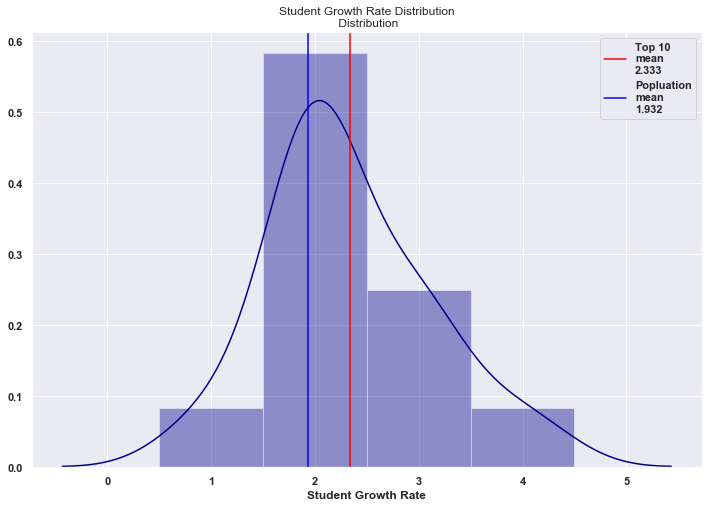

In [65]:
one_sample_ttest(subset_df.student_growth,df_1.student_growth.mean(),.05)
plt.xlabel('Student Growth Rate')
plt.title('Student Growth Rate Distribution\n Distribution')
plt.axvline(x=subset_df.student_growth.mean(), color='red', label='Top 10\nmean\n2.333')
plt.axvline(x=df_1.student_growth.mean(), color='blue', label= 'Popluation\nmean\n1.932')
# plt.text(2.55,.2,'Top 10\nmean\n2.333', color='red',horizontalalignment='center')
# plt.text(1.6,.18,'Popluation\nmean\n1.932', color='blue',horizontalalignment='center')
plt.legend()

In [51]:
not_subset_df = df_1[df_1['hardship_index'] >= 30]

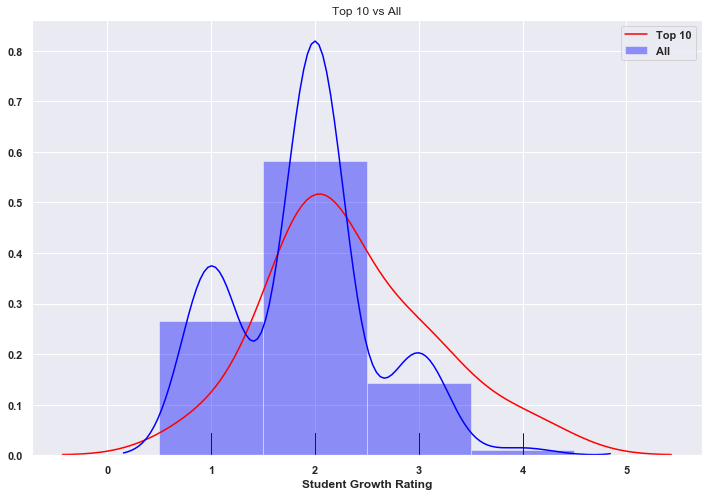

In [90]:
sns.distplot(subset_df.student_growth, hist=False, rug=True, color='red', label='Top 10', bins=4, hist_kws={"range": [.5,4.5]})
sns.distplot(not_subset_df.student_growth, hist=True, rug=True, color='blue', label='All', bins=4, hist_kws={"range": [.5,4.5]})
plt.title('Top 10 vs All')
plt.xlabel('Student Growth Rating')
plt.legend();

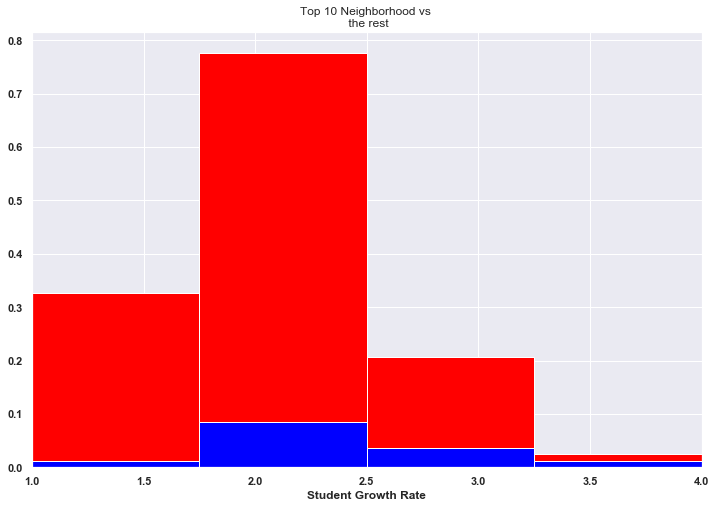

In [71]:

plt.hist([subset_df.student_growth,not_subset_df.student_growth], stacked=True, density=True, color=["blue", "red"],range=(1,4), bins=4)
plt.title('Top 10 Neighborhood vs \n the rest')
plt.xlabel('Student Growth Rate')
plt.xlim(1,4,1)
plt.show()

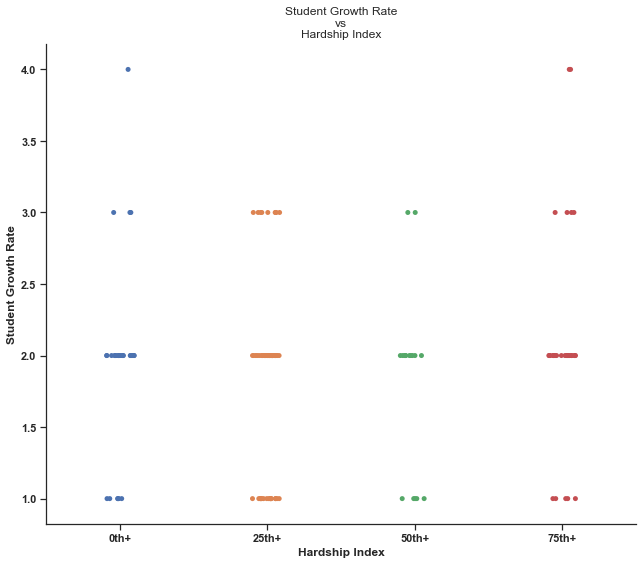

In [53]:
sns.set(style="ticks")
g = sns.catplot(x='hardship_index', y='student_growth', data=final_df_categorical, order=['0th+', '25th+','50th+','75th+'])
plt.title('Student Growth Rate\nvs\nHardship Index')
plt.xlabel('Hardship Index')
plt.ylabel('Student Growth Rate')
g.fig.set_size_inches(10,8)

In [54]:
charter_df = final_df[final_df['school_type'] == 'Charter']

In [55]:
charter_df

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,400056,60651,3,Charter,Austin,15957,73
16,400157,60617,3,Charter,South Deering,14685,65
41,400094,60617,3,Charter,South Deering,14685,65
46,400113,60610,2,Charter,Near North Side,88669,1
51,400170,60610,3,Charter,Near North Side,88669,1
61,400179,60632,3,Charter,West Elsdon,15754,69
65,400085,60632,2,Charter,West Elsdon,15754,69
69,400149,60632,2,Charter,West Elsdon,15754,69
75,400077,60637,2,Charter,Washington Park,13785,88
226,400105,60616,2,Charter,Near South Side,59077,7


In [56]:
final_df.loc[:,'student_growth'] = final_df.student_growth.astype(int)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
final_df.student_growth.mean()

1.9323308270676691

In [58]:
charter_df.student_growth.mean()

2.3488372093023258

Null hypothesis rejected. Results are statistically significant with t-value = 3.49 critical t-value = 1.6819523559426 and p-value = 0.0011588387


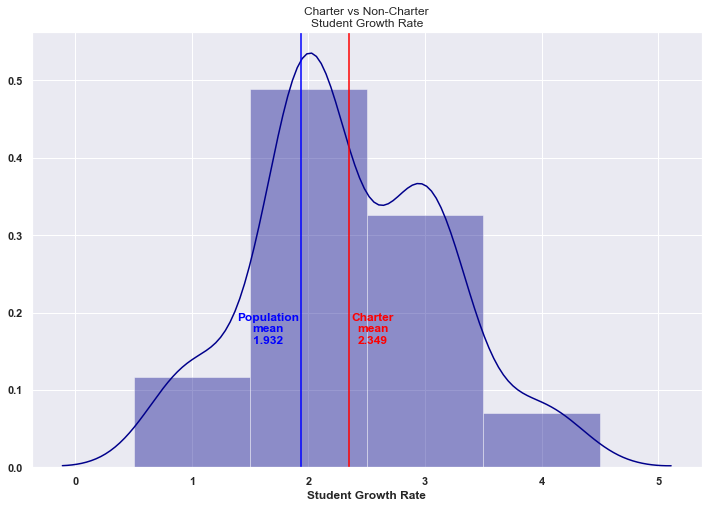

In [68]:
one_sample_ttest(charter_df.student_growth, final_df.student_growth.mean(), 0.05)
plt.title('Charter vs Non-Charter\nStudent Growth Rate')
plt.axvline(x=charter_df.student_growth.mean(), color='red')
plt.text(2.55,.16,'Charter\nmean\n2.349',rotation=0, color='red',horizontalalignment='center')
plt.axvline(x=final_df.student_growth.mean(), color='blue')
plt.text(1.65,.16,'Population\nmean\n1.932',color='blue',horizontalalignment='center')
plt.xlabel('Student Growth Rate');